In [9]:
import numpy as np
from collections import Counter
def euclidean_distance(x1,x2):
    distance = np.sqrt(np.sum((x1 - x2)**2))
    return distance
class KNN:
    def __init__(self,k):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        y_pred = [self._predict(x) for x in X]
        return np.array(y_pred)
    def _predict(self, x):
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest_labels).most_common(1)
        print(distances)
        return most_common[0][0]

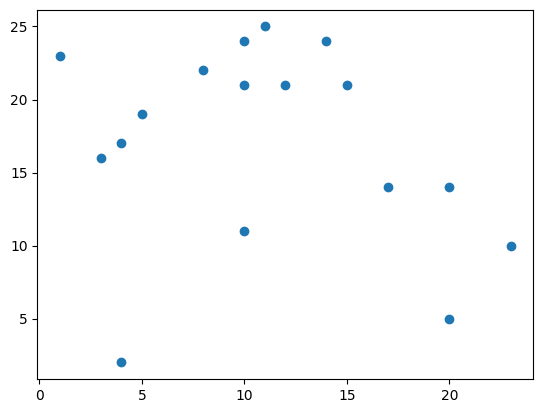

In [50]:
import matplotlib.pyplot as plt
x1 = [4, 5, 10, 4, 3, 11, 14, 8, 10, 12, 15, 20,17,23, 10, 20,1]
x2 = [2, 19, 24, 17, 16, 25, 24, 22, 21, 21, 21, 5, 14,10,11,14,23]
classes = [0,1,1,0,0,1,1,0,1,1,1,0,1,1,0,0,1]
data = list(zip(x1,x2))
x,y2 = np.array(data), np.array(classes)
plt.scatter(x[:,0],x[:,1])
plt.show()

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y2, test_size=0.2, shuffle=True)
print(X_train)
print(y_train)
print(X_test)
print(y_test)

[[ 5 19]
 [ 1 23]
 [11 25]
 [20 14]
 [ 3 16]
 [ 4 21]
 [12 21]
 [10 24]
 [ 8 22]
 [10 21]
 [10 11]
 [15 21]
 [23 10]]
[1 1 1 0 0 0 1 1 0 1 0 1 1]
[[ 4 17]
 [20  5]
 [14 24]
 [17 14]]
[0 0 1 1]


In [45]:
clf = KNN(k=2)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
print("predictions result")
print(predictions)

[2.23606797749979, 6.708203932499369, 10.63014581273465, 16.278820596099706, 1.4142135623730951, 4.0, 8.94427190999916, 9.219544457292887, 6.4031242374328485, 7.211102550927978, 8.48528137423857, 11.704699910719626, 20.248456731316587]
[20.518284528683193, 26.1725046566048, 21.93171219946131, 9.0, 20.248456731316587, 22.627416997969522, 17.88854381999832, 21.470910553583888, 20.808652046684813, 18.867962264113206, 11.661903789690601, 16.76305461424021, 5.830951894845301]
[10.295630140987, 13.038404810405298, 3.1622776601683795, 11.661903789690601, 13.601470508735444, 10.44030650891055, 3.605551275463989, 4.0, 6.324555320336759, 5.0, 13.601470508735444, 3.1622776601683795, 16.64331697709324]
[13.0, 18.35755975068582, 12.529964086141668, 3.0, 14.142135623730951, 14.7648230602334, 8.602325267042627, 12.206555615733702, 12.041594578792296, 9.899494936611665, 7.615773105863909, 7.280109889280518, 7.211102550927978]
predictions result
[0 1 1 0]


In [49]:
new_x = 5
new_y = 15
new_point = np.array([new_x, new_y])
prediction = clf.predict(new_point)
print("predictions result")
print(predictions)

[14.0, 18.439088914585774, 20.8806130178211, 17.4928556845359, 11.180339887498949, 16.0312195418814, 17.46424919657298, 19.6468827043885, 17.26267650163207, 16.76305461424021, 7.810249675906654, 18.867962264113206, 18.681541692269406]
[10.770329614269007, 16.1245154965971, 10.770329614269007, 5.0990195135927845, 12.041594578792296, 12.529964086141668, 6.708203932499369, 10.295630140987, 9.899494936611665, 7.810249675906654, 6.4031242374328485, 6.0, 9.433981132056603]
predictions result
[0 1 1 0]


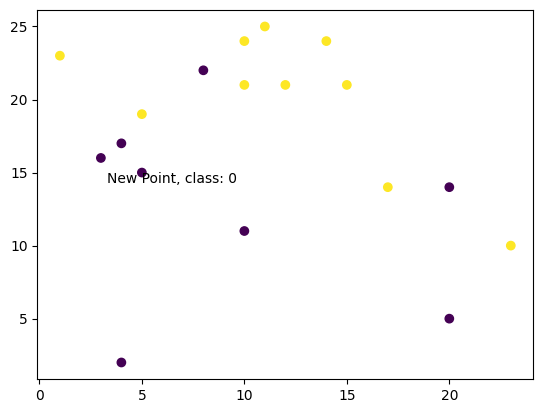

array([13.03840481,  4.        , 10.29563014,  2.23606798,  2.23606798,
       11.66190379, 12.72792206,  7.61577311,  7.81024968,  9.21954446,
       11.66190379, 18.02775638, 12.04159458, 18.68154169,  6.40312424,
       15.03329638,  8.94427191])

In [51]:
plt.scatter(x1+[new_x],x2+[new_y], c=classes + [prediction[0]])
plt.text(new_x-1.7, new_y-0.7, s=f'New Point, class: {prediction[0]}')
plt.show()
new_point
distances = np.linalg.norm(x - new_point, axis=1)
distances
new_point
distances = np.linalg.norm(x - new_point, axis=1)
distances